In [1]:
import os
import pandas as pd
from datetime import timedelta

In [2]:
def last_x_days(df, x):
    max_date = df["Date"].max()
    dt = max_date - timedelta(days=x-1)
    return df[df["Date"] >= dt]

In [3]:
df = pd.read_excel("/home/cedric/data_to_add.xlsx")
df = df[df['Type'] == "Balade"]

In [4]:
vc = df['Personne'].value_counts().to_frame().reset_index()
vc = vc[vc['count']>=5]['Personne'].values

au_moins_5_balades = df[df['Personne'].isin(vc)]

In [5]:
df_c = pd.pivot_table(au_moins_5_balades, index="Chien", columns="Personne", values="Date", aggfunc='count').fillna(0)

In [6]:
df_c

Personne,Agnès,Alice,Anne-Laure,Charline,Christian,Claude,Cédric,Denise,Flo,Isa,Laura,Margaux,Olivier,Pauline,Renée
Chien,,,,,,,,,,,,,,,
Afefe,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aladina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Artem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Belette,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Bill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Twix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tyson,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


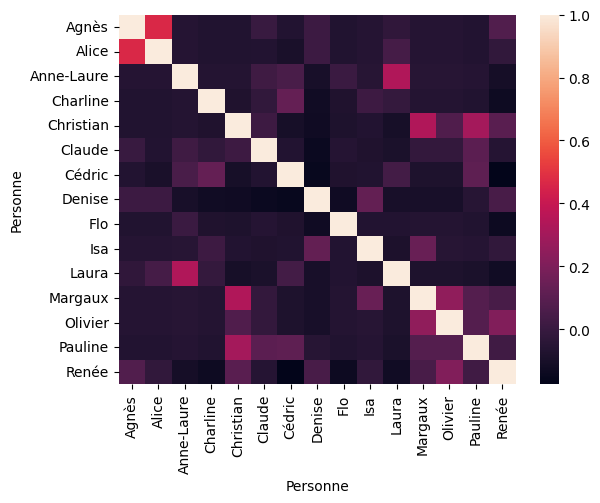

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt


corr_matrix = df_c.corr()
sn.heatmap(corr_matrix)
plt.show()

In [79]:
df_p = pd.pivot_table(au_moins_5_balades, index="Personne", columns="Chien", values="Date", aggfunc='count').fillna(0)
df_p = (df_p>=1).astype(int)
x = df_p.values
y = df_p.index

In [98]:
df_c = pd.pivot_table(au_moins_5_balades, index="Chien", columns="Personne", values="Date", aggfunc='count').fillna(0)
df_c = (df_c>=1).astype(int)
x = df_c.values
y = df_c.index

In [99]:
y

Index(['Afefe', 'Aladina', 'Artem', 'Belette', 'Bill', 'Cajou', 'Caporal',
       'Dick', 'Didi', 'Djibouti', 'Gunther', 'Harry', 'Hella', 'Hijo',
       'Hisaya', 'Horrya', 'Hubble', 'Ilo', 'Jeepsy', 'Jocker', 'Jora', 'José',
       'Jude', 'Kingston', 'Kiwi', 'Laik', 'Laika', 'Lana', 'Laya', 'Laïk',
       'Liu Ahn', 'Loki', 'Lost', 'Lucky', 'Marcy', 'Mawgai', 'Maya',
       'Mayenne', 'Mishima', 'Nala (Staff)', 'Narcos', 'Narko', 'Nooky',
       'Noucky', 'Osia', 'Otam', 'Ottawa', 'Pako', 'Parker', 'Pataya',
       'Phallone', 'Phallonne', 'Plouf', 'Pongo', 'Poupette', 'Princesse',
       'Procesco', 'Quil', 'Reina', 'Roxy', 'Ruby', 'Saiko (Staff)', 'Sensei',
       'Soultan', 'Stark', 'Tempete', 'Thelma', 'Thug's', 'Tino', 'Twix',
       'Tyson', 'Zeus', 'Zoulou'],
      dtype='object', name='Chien')

In [100]:
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    cpt = 0
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist, cpt))
        cpt += 1
        distances.sort(key=lambda tup: tup[1])
    # print(distances)
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append([distances[i][2], distances[i][1]])
    return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    return neighbors

In [103]:
k=5
for i in range(len(y)):
    prediction = predict_classification(x, x[i], k+1)
    print()
    print('Promeneur %s' % (y[i]))
    for j in range(k):
        print('Plus similaire #%d = %s (Différence : %f).' % (j+1, y[int(prediction[j+1][0])], prediction[j+1][1]))


Promeneur Afefe
Plus similaire #1 = Gunther (Différence : 1.000000).
Plus similaire #2 = Hubble (Différence : 1.000000).
Plus similaire #3 = Laika (Différence : 1.000000).
Plus similaire #4 = Liu Ahn (Différence : 1.000000).
Plus similaire #5 = Pataya (Différence : 1.000000).

Promeneur Aladina
Plus similaire #1 = Hisaya (Différence : 0.000000).
Plus similaire #2 = Horrya (Différence : 0.000000).
Plus similaire #3 = Loki (Différence : 0.000000).
Plus similaire #4 = Quil (Différence : 0.000000).
Plus similaire #5 = Tino (Différence : 0.000000).

Promeneur Artem
Plus similaire #1 = Cajou (Différence : 0.000000).
Plus similaire #2 = Osia (Différence : 0.000000).
Plus similaire #3 = Otam (Différence : 0.000000).
Plus similaire #4 = Saiko (Staff) (Différence : 0.000000).
Plus similaire #5 = Aladina (Différence : 1.000000).

Promeneur Belette
Plus similaire #1 = Ottawa (Différence : 1.000000).
Plus similaire #2 = Parker (Différence : 1.000000).
Plus similaire #3 = Plouf (Différence : 1.0000